In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as web
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
import datetime as dt
import mplfinance as mpf

In [2]:
# Save ticker data with a start and end time to a csv file
def save_to_csv_from_yahoo(ticker, syear, smonth, sday, eyear, emonth, eday):
    start = dt.datetime(syear, smonth, sday)
    end = dt.datetime(eyear, emonth, eday)
    
    df = web.DataReader(ticker, 'yahoo', start, end)
    df.to_csv("F:/Code/Python/Jupyter/Finance/datasets/" + ticker + ".csv")
    
    return df

In [3]:
# Function that returns a dataframe from a CSV
def get_df_from_csv(ticker):
    try:
        df = pd.read_csv("F:/Code/Python/Jupyter/Finance/datasets/" + ticker + ".csv")
    except FileNotFoundError:
        print("File Doesn't Exist")
    else:
        return df
        


In [4]:
# Add Daily Return to Dataframe
# Simple rate of return = (EP / BP) - 1
def add_daily_return_to_df(df, ticker):
    df['daily_return'] = (df['Adj Close'] / df['Adj Close'].shift(1)) - 1
    df.to_csv("F:/Code/Python/Jupyter/Finance/datasets/" + ticker + ".csv")
    
    return df

In [5]:
# Returns Total Return over Time
def get_return_defined_time(df, syear, smonth, sday, eyear, emonth, eday):
    # Create representations for the dates
    start = f"{syear}-{smonth}-{sday}"
    end = f"{eyear}-{emonth}-{eday}"
    df['Date'] = pd.to_datetime(df['Date'])
    
    # Grab data between defined dates
    mask = (df['Date'] >= start) & (df['Date'] <= end)
    
    # Get the of the the daily return column
    daily_ret = df.loc[mask]['daily_return'].mean()
    
    # Number of days between 2 dates
    df2 = df.loc[mask]
    days = df2.shape[0]
    
    return (days * daily_ret)

In [6]:
def mplfinance_plot(ticker, chart_type, syear, smonth, sday, eyear, emonth, eday):
    # Create representations for the dates
    start = f"{syear}-{smonth}-{sday}"
    end = f"{eyear}-{emonth}-{eday}"
    
    try:
        df = pd.read_csv("F:/Code/Python/Jupyter/Finance/datasets/" + ticker + ".csv")
    except FileNotFoundError:
        print("File Doesn't Exist")
    else:
        df.index = pd.DatetimeIndex(df['Date'])
        df_sub = df.loc[start:end]
        
        # Candle Chart
        mpf.plot(df_sub, type='candle')
        # Line Chart
        mpf.plot(df_sub, type='line')
        # Moving Average Chart
        mpf.plot(df_sub, type='ohlc', mav=4)
        
        # Style plots
        s = mpf.make_mpf_style(base_mpf_style='charles', rc={'font.size': 8})
        fig = mpf.figure(figsize=(12, 8), style=s)
        ax = fig.add_subplot(2,1,1)
        av = fig.add_subplot(2,1,2, sharex=ax)
        mpf.plot(df_sub, type=chart_type, mav=(3,5,7), ax=ax, volume=av, show_nontrading=True)

In [7]:
# Simple Price Plot
def price_lot(ticker, syear, smonth, sday, eyear, emonth, eday):
    # Create representations for the dates
    start = f"{syear}-{smonth}-{sday}"
    end = f"{eyear}-{emonth}-{eday}"
    
    try:
        df = pd.read_csv("F:/Code/Python/Jupyter/Finance/datasets/" + ticker + ".csv")
    except FileNotFoundError:
        print("File Doesn't Exist")
    else:
        df.index = pd.DatetimeIndex(df['Date'])
        df_sub = df.loc[start:end]
        df_np = df_sub.to_numpy()
        np_adj_close = df_np[:,5]
        date_arr = df_np[:,1]
        
        # Define area taken up by plot
        fig = plt.figure(figsize=(12,8), dpi=100)
        axes = fig.add_axes([0,0,1,1])
        axes.plot(date_arr, np_adj_close, color='navy')
        axes.xaxis.set_major_locator(plt.MaxNLocator(8))
        axes.grid(True, color='0.6', dashes={5,2,1,2})
        axes.set_facecolor('#FAEBD7')

In [8]:
# Download Multiple Stocks
def download_multiple_stocks(syear, smonth, sday, eyear, emonth, eday, *args):
    for x in args:
        save_to_csv_from_yahoo(x, syear, smonth, sday, eyear, emonth, eday)

In [9]:
# Merge Multiple Stocks in One Dataframe by Column Name
def merge_df_by_column_name(col_name, syear, smonth, sday, eyear, emonth, eday, *tickers):
    mult_df = pd.DataFrame()
    
    start = f"{syear}-{smonth}-{sday}"
    end = f"{eyear}-{emonth}-{eday}"
    
    for x in tickers:
        mult_df[x] = web.DataReader(x, 'yahoo', start, end)[col_name]
        
    return mult_df

In [10]:
# Get Changing Value of Investment using Multiple Stocks
def plot_return_mult_stocks(investment, stock_df):
    (stock_df / stock_df.iloc[0] * investment).plot(figsize = (15,6))

In [11]:
# Get Standard Deviation for Multiple Stocks
def get_stock_mean_sd(stock_df, ticker):
    return stock_df[ticker].mean(), stock_df[ticker].std()

In [12]:
def get_mult_stock_mean_sd(stock_df):
    for stock in stock_df:
        mean, sd = get_stock_mean_sd(stock_df, stock)
        cov = sd / mean
        
        print("Stock: {:4}; Mean: {:7.2f}; Standard deviation: {:2.2f}".format(stock, mean, sd))
        print("Coefficient of Variation: {}\n".format(cov))

<h2>Test Functions</h2>

Total return:  0.6166401575831238


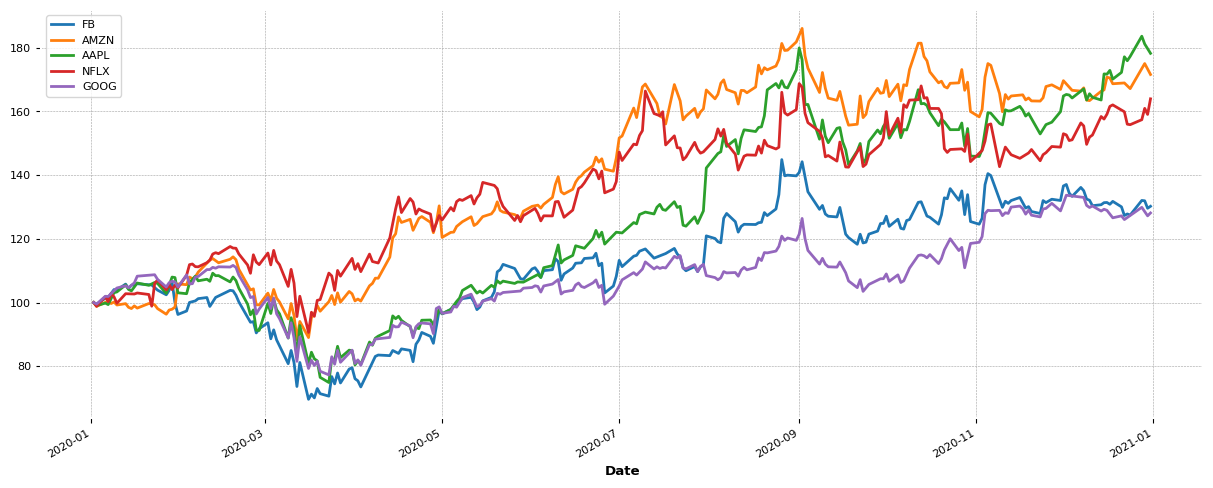

In [43]:
save_to_csv_from_yahoo('AMZN', 2020, 1, 1, 2021, 1, 1)

AMZN = get_df_from_csv('AMZN')

add_daily_return_to_df(AMZN, 'AMZN')

AMZN

total_return = get_return_defined_time(AMZN, 2020, 1, 1, 2021, 1, 1)
print("Total return: " , total_return)

#mplfinance_plot('AMZN', 'ohlc', 2020, 1, 1, 2021, 1, 1)
#rice_lot('AMZN', 2020, 1, 1, 2021, 1, 1)

tickers = ["FB", "AAPL", "NFLX", "GOOG"]
#download_multiple_stocks(2020, 1, 1, 2021, 1, 1, *tickers)

tickers = ["FB", "AMZN", "AAPL", "NFLX", "GOOG"]
mult_df = merge_df_by_column_name('Adj Close', 2020, 1, 1, 2021, 1, 1, *tickers)
plot_return_mult_stocks(100, mult_df)

get_mult_stock_mean_sd(mult_df)
mult_df